<a href="https://colab.research.google.com/github/abubakrsiddq/BinaryMap/blob/master/ffa_onnx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/zhilin007/FFA-Net.git

fatal: destination path 'FFA-Net' already exists and is not an empty directory.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd FFA-Net/net/

/content/FFA-Net/net


In [4]:
import io
import numpy as np

from torch import nn
import torch.utils.model_zoo as model_zoo
import torch.onnx
from models import *
import PIL.Image as pil
import torch.nn as nn
import torchvision.transforms as tfs 
import torchvision.utils as vutils
import matplotlib.pyplot as plt
from torchvision.utils import make_grid

In [5]:
torch_model =FFA(gps=3,blocks=19)

In [6]:
pretrain=torch.load('/content/drive/MyDrive/ots_train_ffa_3_19.pk',map_location=torch.device('cpu'))


In [7]:
weights={}
for k,v in pretrain['model'].items():
  weights[k[7:]]=v

In [8]:
torch_model.load_state_dict(state_dict=weights)

<All keys matched successfully>

In [103]:
#haze=pil.open('/content/drive/MyDrive/Final_compare/HAZY/10_outdoor_hazy.jpg')
haze=pil.open('/content/drive/MyDrive/test_set/hazy/0_kitti_hazy.png')

In [56]:
#haze=np.asarray(haze)

In [57]:
haze1=haze[0:176,0:608,:]

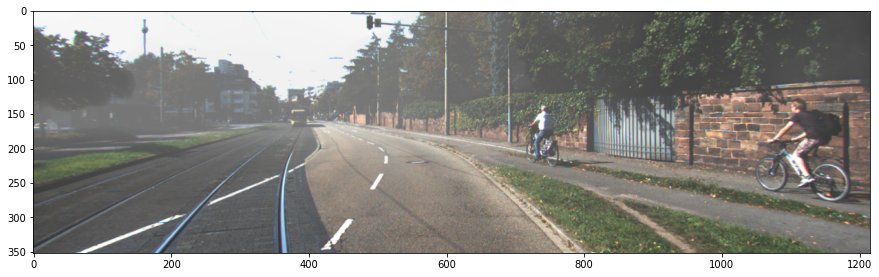

In [104]:
plt.figure(figsize=(15,15))
plt.imshow(haze)

In [105]:
haze1= tfs.Compose([
        tfs.ToTensor(),
        #tfs.Normalize(mean=[0.64, 0.6, 0.58],std=[0.14,0.15, 0.152])
    ])(haze)[None,::]

In [70]:
haze1.shape

torch.Size([1, 3, 352, 1216])

In [106]:
torch_model.eval()
with torch.no_grad():
        pred = torch_model(haze1)

In [107]:
import matplotlib.pyplot as plt


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


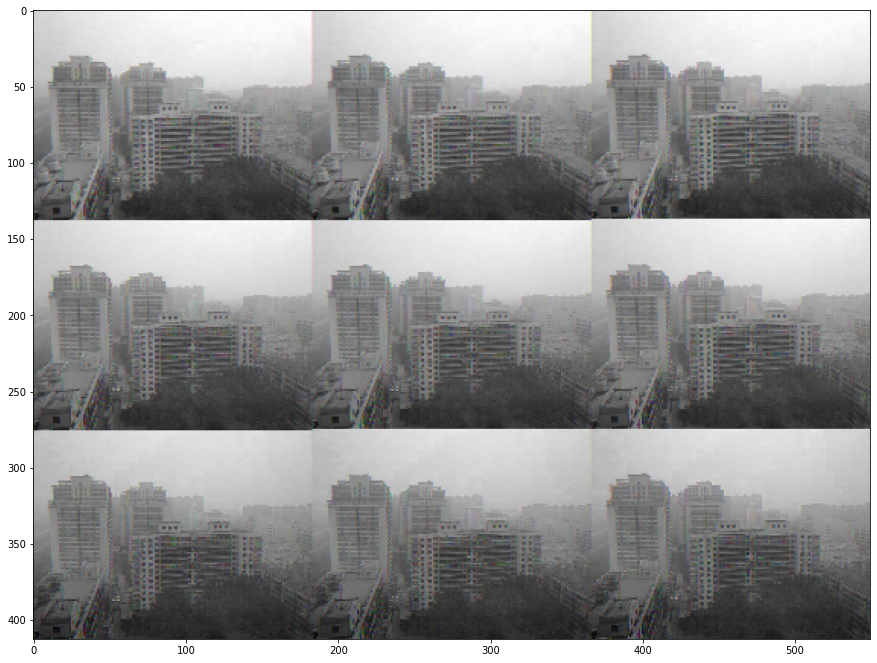

In [88]:
plt.figure(figsize=(15,15))
plt.imshow(np.reshape(pred[0].detach().numpy(),(413,550,3)))
#np.reshape(pred[0].detach().numpy(),(176,608,3))[:,:,3].shape

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


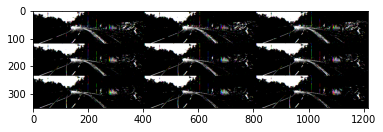

In [78]:
i=haze1.reshape(352,-1,3)
plt.imshow(i)

In [77]:
haze1.shape

torch.Size([3, 352, 1216])

In [89]:
ts=torch.squeeze(pred.clamp(0,1).cpu())

In [92]:
from test import *

usage: ipykernel_launcher.py [-h] [--task TASK] [--test_imgs TEST_IMGS]
ipykernel_launcher.py: error: unrecognized arguments: -f /root/.local/share/jupyter/runtime/kernel-7907fe2b-7fa0-470e-a914-e84c7cca726a.json


SystemExit: ignored

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


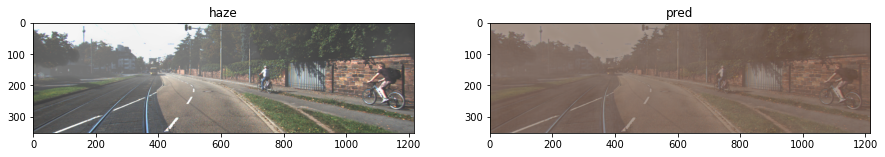

In [108]:
tensorShow([haze1,pred.clamp(0,1).cpu()],['haze','pred'])

In [99]:
def tensorShow(tensors,titles=['haze']):
        fig=plt.figure(figsize=(15,15))
        for tensor,tit,i in zip(tensors,titles,range(len(tensors))):
            img = make_grid(tensor)
            npimg = img.numpy()
            ax = fig.add_subplot(221+i)
            ax.imshow(np.transpose(npimg, (1, 2, 0)))
            ax.set_title(tit)
        plt.show()